# Data Cleansing and Preparation: Part II

Import libraries

In [21]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

Using pandas to read csv for assignment seven

In [22]:
products = pd.read_csv('assignment_seven.csv')

Reading first five rows of data 

In [4]:
products.head()

,transaction_id,transaction_date,full_name,record_id,products
0,1,7/19/2021,Izzy Janssens,1df9f42a-8c0f-4e3d-aeca-5bd310dd277a,TERBUTALINE SULFATE
1,2,9/25/2021,Timmy Sanches,afaf2462-41b1-43dc-8702-264cf2a6ade0,Fentanyl
2,3,10/7/2021,Skyler Rawlcliffe,34528325-deb3-4deb-9107-12a89f5d1cfc,Lorazepam
3,4,5/26/2022,Torrance Petteford,6e379186-e61e-4926-ad03-0ac7759d7fab,risperidone
4,5,12/17/2021,Bendite Fardon,b0eb4c68-5737-4076-856d-7eacf2e6014d,Oxygen


Dropping all real names per Federal guidelines, so removing "full_name" column 

In [5]:
products.drop('full_name', axis=1, inplace=True)

Making sure the names dropped

In [6]:
products.head()

,transaction_id,transaction_date,record_id,products
0,1,7/19/2021,1df9f42a-8c0f-4e3d-aeca-5bd310dd277a,TERBUTALINE SULFATE
1,2,9/25/2021,afaf2462-41b1-43dc-8702-264cf2a6ade0,Fentanyl
2,3,10/7/2021,34528325-deb3-4deb-9107-12a89f5d1cfc,Lorazepam
3,4,5/26/2022,6e379186-e61e-4926-ad03-0ac7759d7fab,risperidone
4,5,12/17/2021,b0eb4c68-5737-4076-856d-7eacf2e6014d,Oxygen


In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    1000 non-null   int64 
 1   transaction_date  1000 non-null   object
 2   record_id         968 non-null    object
 3   products          967 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


Created heatmap to show which columns had null values

<AxesSubplot:>

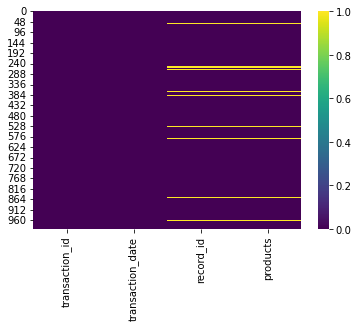

In [8]:
sns.heatmap(products.isnull(), cmap='viridis')

As seen in heatmap above, there are null values in "record_id" and "products" columns

Dropping null values from "record_id" and "products"

In [11]:
products = products.dropna(subset=['record_id'])

In [12]:
products = products.dropna(subset=['products'])

Checking to make sure null values dropped from each column

In [14]:
products['record_id'].isnull().values.any()

False

In [15]:
products['products'].isnull().values.any()

False

In [16]:
print(products)

     transaction_id transaction_date                             record_id  \
0                 1        7/19/2021  1df9f42a-8c0f-4e3d-aeca-5bd310dd277a   
1                 2        9/25/2021  afaf2462-41b1-43dc-8702-264cf2a6ade0   
2                 3        10/7/2021  34528325-deb3-4deb-9107-12a89f5d1cfc   
3                 4        5/26/2022  6e379186-e61e-4926-ad03-0ac7759d7fab   
4                 5       12/17/2021  b0eb4c68-5737-4076-856d-7eacf2e6014d   
..              ...              ...                                   ...   
995             996        5/26/2022  67a9dcee-3784-482a-9505-2665a7c1cc02   
996             997        9/11/2021  7d36bb32-112c-4836-ba3d-6e3bbbbc82d8   
997             998       11/25/2021  421ff0bb-919c-4dd8-af59-db9fd3ea3248   
998             999        3/11/2022  fe266fd4-c22f-4d3f-a276-74016092df33   
999            1000         3/3/2022  ecf09222-1bb5-479c-a5c0-19d0762f340d   

                           products  
0               TERBUTALI

Saving new dataset as "output.csv"

In [18]:
products.to_csv('output.csv') 

Using pandas to read output.csv dataset 

In [55]:
output = pd.read_csv('output.csv')

In [56]:
output.head()

,Unnamed: 0,transaction_id,transaction_date,record_id,products
0,0,1,7/19/2021,1df9f42a-8c0f-4e3d-aeca-5bd310dd277a,TERBUTALINE SULFATE
1,1,2,9/25/2021,afaf2462-41b1-43dc-8702-264cf2a6ade0,Fentanyl
2,2,3,10/7/2021,34528325-deb3-4deb-9107-12a89f5d1cfc,Lorazepam
3,3,4,5/26/2022,6e379186-e61e-4926-ad03-0ac7759d7fab,risperidone
4,4,5,12/17/2021,b0eb4c68-5737-4076-856d-7eacf2e6014d,Oxygen


Using the value_counts function from pandas to check top 5 most frequent occuring values in "products" column

In [72]:
output['products'].value_counts().head(5)

Acetaminophen       13
Ibuprofen           10
TITANIUM DIOXIDE    10
ALCOHOL              8
Salicylic Acid       8
Name: products, dtype: int64

Bar graph showing top 5 products

<AxesSubplot:>

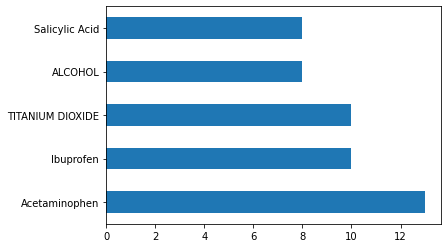

In [73]:
output['products'].value_counts()[:5].plot(kind='barh')